In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier


In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
# Load the Iris dataset
iris = load_iris(as_frame=True)

In [22]:
X = iris.data
y = iris.target

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [24]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [25]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Decision Tree Classifier
print("Decision Tree Classifier")
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_dtc)}")
print(confusion_matrix(y_test, y_pred_dtc))
print(classification_report(y_test, y_pred_dtc))

Decision Tree Classifier
Accuracy: 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



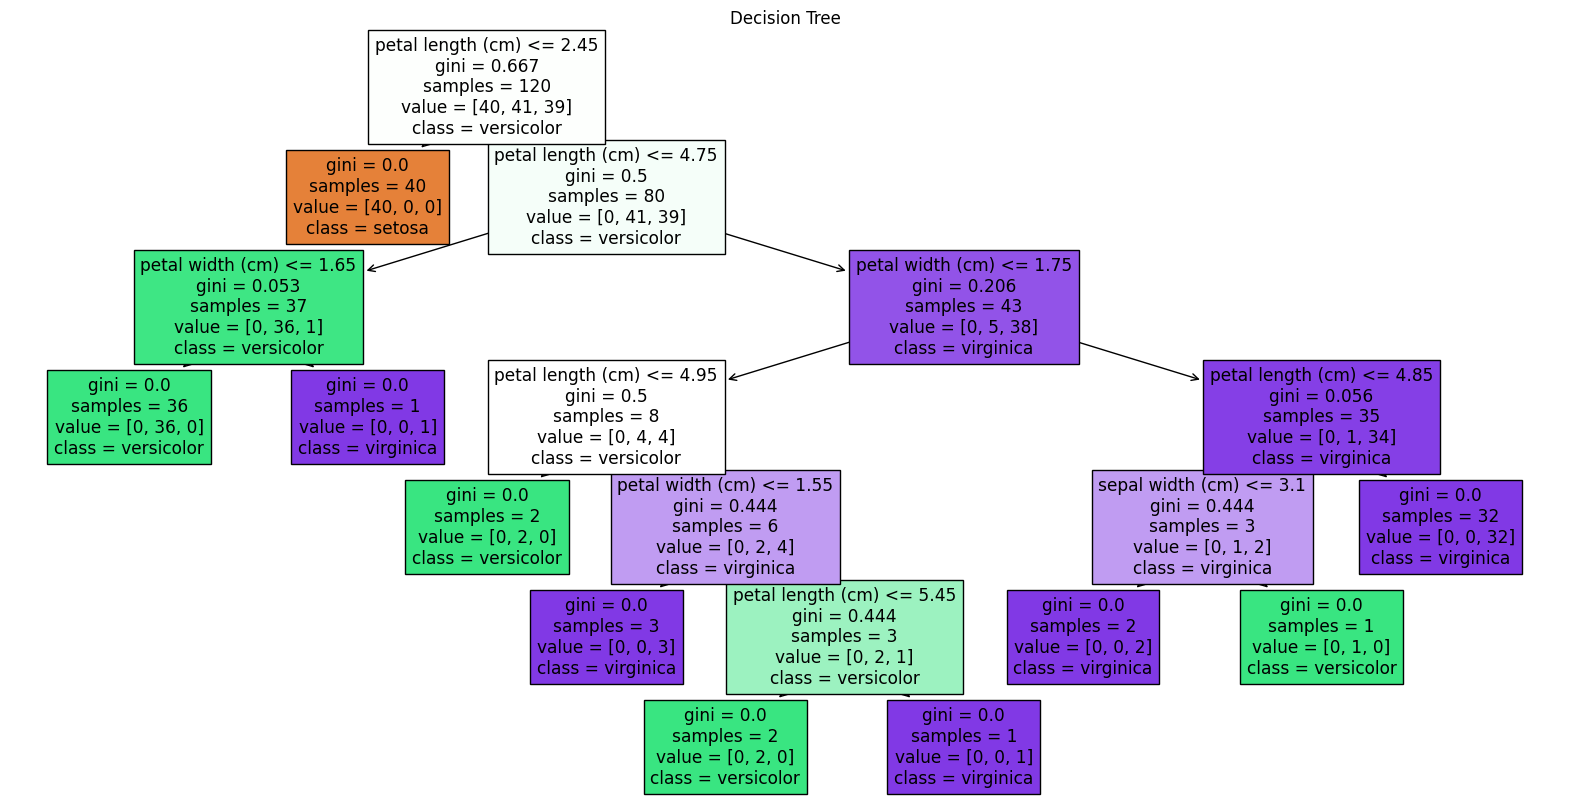

In [28]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dtc, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree")
plt.show()

In [29]:
# Rule-Based Classifier (Using Decision Tree rules)
print("\nRule-Based Classifier")
from sklearn.tree import export_text
tree_rules = export_text(dtc, feature_names=list(X_train.columns))
print(tree_rules)


Rule-Based Classifier
|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- petal length (cm) <= 4.85
|   |   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |   |--- class: 1


In [30]:
# k-Nearest Neighbors Classifier
print("\nk-Nearest Neighbors Classifier")
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


k-Nearest Neighbors Classifier
Accuracy: 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [13]:
# Bayesian Classifier
print("\nBayesian Classifier")
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_gnb)}")
print(confusion_matrix(y_test, y_pred_gnb))
print(classification_report(y_test, y_pred_gnb))


Bayesian Classifier
Accuracy: 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [14]:
# Artificial Neural Network Classifier
print("\nArtificial Neural Network Classifier")
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_mlp)}")
print(confusion_matrix(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))


Artificial Neural Network Classifier
Accuracy: 0.9666666666666667
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [15]:
# Model Comparison using Cross-Validation
print("\nModel Comparison using Cross-Validation")
classifiers = {
    'Decision Tree': dtc,
    'k-NN': knn,
    'Naive Bayes': gnb,
    'Neural Network': mlp
}

for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    print(f"{name} Accuracy: {scores.mean()} (+/- {scores.std() * 2})")


Model Comparison using Cross-Validation
Decision Tree Accuracy: 0.9416666666666668 (+/- 0.11303883305208778)
k-NN Accuracy: 0.9583333333333334 (+/- 0.09128709291752769)
Naive Bayes Accuracy: 0.9416666666666668 (+/- 0.1247219128924647)
Neural Network Accuracy: 0.975 (+/- 0.09999999999999999)


In [16]:
# Overfitting and Validation
print("\nOverfitting and Validation")
# Grid Search to find optimal hyperparameters for Decision Tree
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best parameters found by Grid Search:")
print(grid_search.best_params_)

best_dtc = grid_search.best_estimator_
y_pred_best_dtc = best_dtc.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_dtc)}")
print(confusion_matrix(y_test, y_pred_best_dtc))
print(classification_report(y_test, y_pred_best_dtc))


Overfitting and Validation
Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV

In [17]:
# Grid Search to find optimal hyperparameters for k-NN
print("\nGrid Search for k-Nearest Neighbors")
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, n_jobs=-1, verbose=2)
grid_search_knn.fit(X_train, y_train)
print("Best parameters found by Grid Search for k-NN:")
print(grid_search_knn.best_params_)

best_knn = grid_search_knn.best_estimator_
y_pred_best_knn = best_knn.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_knn)}")
print(confusion_matrix(y_test, y_pred_best_knn))
print(classification_report(y_test, y_pred_best_knn))


Grid Search for k-Nearest Neighbors
Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s

[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s

[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END .

In [18]:
# Grid Search to find optimal hyperparameters for MLP Classifier
print("\nGrid Search for MLP Classifier")
param_grid_mlp = {
    'hidden_layer_sizes': [(10,), (50,), (100,), (10, 10), (50, 50), (100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'adaptive']
}

grid_search_mlp = GridSearchCV(estimator=mlp, param_grid=param_grid_mlp, cv=5, n_jobs=-1, verbose=2)
grid_search_mlp.fit(X_train, y_train)
print("Best parameters found by Grid Search for MLP Classifier:")
print(grid_search_mlp.best_params_)

best_mlp = grid_search_mlp.best_estimator_
y_pred_best_mlp = best_mlp.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_mlp)}")
print(confusion_matrix(y_test, y_pred_best_mlp))
print(classification_report(y_test, y_pred_best_mlp))


Grid Search for MLP Classifier
Fitting 5 folds for each of 192 candidates, totalling 960 fits


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd; total time=   0.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd; total time=   1.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd; total time=   1.1s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization

[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd; total time=   1.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd; total time=   1.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam; total time=   1.2s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam; total time=   1.3s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization

[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time=   1.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time=   1.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time=   1.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam; total time=   1.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time=   1.4s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time=   1.3s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam; total time=   1.0s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam; total time=   1.4s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   1.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   1.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   1.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   0.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   1.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   1.9s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   0.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   1.0s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   1.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   1.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   1.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   1.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   1.8s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   0.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   0.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.9s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   1.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   1.2s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   2.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   2.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   2.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   1.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   2.1s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   0.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   2.0s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   0.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   2.0s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization

[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   2.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   2.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   2.5s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=sgd; total time=   1.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=sgd; total time=   1.2s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=sgd; total time=   1.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=adam; total time=   0.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=sgd; total time=   1.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=sgd; total time=   1.3s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=adam; total time=   0.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=adam; total time=   1.1s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization

[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10), learning_rate=adaptive, solver=sgd; total time=   1.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10), learning_rate=adaptive, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10), learning_rate=adaptive, solver=adam; total time=   0.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10), learning_rate=adaptive, solver=sgd; total time=   1.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10), learning_rate=adaptive, solver=sgd; total time=   1.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10), learning_rate=adaptive, solver=sgd; total time=   1.5s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10), learning_rate=adaptive, solver=sgd; total time=   1.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10), learning_rate=adaptive, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10), learning_rate=adaptive, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 10), learning_rate=adaptive, solver=adam; total time=   0.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   0.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   2.1s
[C

/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   3.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   3.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   3.7s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd; total time=   1.0s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd; total time=   1.1s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam; total time=   1.2s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam; total time=   1.0s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time=   1.2s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time=   1.4s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time=   0.9s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time=   1.0s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time=   1.2s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam; total time=   1.2s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam; total time=   1.5s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam; total time=   1.3s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam; total time=   1.4s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   1.3s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   1.3s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   1.6s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   0.8s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   1.5s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   1.9s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   0.9s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   1.4s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization

[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   1.6s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   1.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   1.6s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   1.7s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   1.1s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   1.7s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   0.8s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   0.9s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   1.0s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization

[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   2.2s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   2.2s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   2.2s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   2.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   2.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.9s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   1.0s
[CV] END activation=tanh, alp

/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   1.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   2.0s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   2.2s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   2.4s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   2.3s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=sgd; total time=   1.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=adam; total time=   0.8s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=sgd; total time=   1.4s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=sgd; total time=   1.2s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=sgd; total time=   1.5s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=sgd; total time=   1.3s
[CV] END acti

/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization

[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=adam; total time=   0.8s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10), learning_rate=adaptive, solver=adam; total time=   0.9s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10), learning_rate=adaptive, solver=adam; total time=   0.9s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10), learning_rate=adaptive, solver=sgd; total time=   1.2s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10), learning_rate=adaptive, solver=sgd; total time=   1.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10), learning_rate=adaptive, solver=sgd; total time=   1.3s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10), learning_rate=adaptive, solver=sgd; total time=   1.4s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10), learning_rate=adaptive, solver=sgd; total time=   1.5s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10), learning_rate=adaptive, solver=adam; total time=   0.8s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10), learning_rate=adaptive, solver=adam; total time=   1.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 10), learning_rate=adaptive, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   0.8s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   0.9s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   1.1s
[CV] END a

/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd; total time=   1.2s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   3.7s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd; total time=   1.0s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   4.3s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd; total time=   1.1s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd; total time=   1.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd; total time=   1.2s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   4.3s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam; total time=   0.9s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam; total time=   1.2s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam; total time=   1.4s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam; total time=   1.3s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time=   1.0s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time=   1.1s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time=   1.0s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time=   1.0s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time=   1.0s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam; total time=   1.3s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam; total time=   1.3s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam; total time=   1.4s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   1.7s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   1.8s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   1.8s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   1.5s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization

[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   1.4s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   0.9s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   1.5s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   1.1s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   1.5s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   1.6s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   1.0s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   1.7s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   1.8s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   1.6s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   2.1s
[CV] END activation=tanh, alpha=0.01, 

/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   2.1s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.9s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   2.1s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   2.6s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.9s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   1.3s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   1.2s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   2.1s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   2.2s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   2.4s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   2.2s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   0.9s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   2.4s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   1.0s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=sgd; total time=   1.1s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=sgd; total time=   1.4s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=adam; total time=   0.8s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=sgd; total time=   1.4s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=sgd; total time=   1.6s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=adam; total time=   0.7s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=sgd; total time=   1.7s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=adam; total time=   1.0s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 10), learning_rate=adaptive, solver=sgd; total time=   1.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 10), learning_rate=adaptive, solver=adam; total time=   0.8s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 10), learning_rate=adaptive, solver=sgd; total time=   1.4s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 10), learning_rate=adaptive, solver=sgd; total time=   1.3s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 10), learning_rate=adaptive, solver=sgd; total time=   1.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 10), learning_rate=adaptive, solver=adam; total time=   0.9s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 10), learning_rate=adaptive, solver=sgd; total time=   1.2s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 10), learning_rate=adaptive, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 10), learning_rate=adaptive, solver=adam; total time=   0.7s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 10), learning_rate=adaptive, solver=adam; total time=   0.8s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   0.7s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   0.9s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   1.4s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   2.1s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   2.2s
[CV] END activatio

/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   4.0s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd; total time=   1.0s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd; total time=   0.9s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd; total time=   1.1s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd; total time=   1.2s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   4.0s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam; total time=   0.9s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam; total time=   1.4s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time=   1.0s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization

[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time=   1.1s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time=   1.2s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time=   1.1s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time=   1.4s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam; total time=   0.9s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.1, hidden_layer_si

/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization

[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   1.6s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   1.5s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   1.5s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   1.6s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   1.3s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   1.5s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   0.9s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   1.0s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   1.3s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   1.6s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   1.6s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   0.9s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   1.5s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   1.8s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   0.8s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   2.0s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   2.1s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   2.2s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   2.4s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   2.2s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   1.1s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization

[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   2.3s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   2.1s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   2.2s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   1.9s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   2.3s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   1.1s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=sgd; total time=   1.4s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=adam; total time=   0.8s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=sgd; total time=   1.3s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=sgd; total time=   1.2s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=sgd; total time=   1.3s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=sgd; total time=   1.4s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=adam; total time=   0.8s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=adam; total time=   0.9s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=adaptive, solver=sgd; total time=   1.4s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=adaptive, solver=sgd; total time=   1.5s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=adaptive, solver=sgd; total time=   1.4s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=adaptive, solver=adam; total time=   0.8s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=adaptive, solver=adam; total time=   0.8s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=adaptive, solver=sgd; total time=   1.5s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=adaptive, solver=sgd; total time=   1.5s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=adaptive, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=adaptive, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=adaptive, solver=adam; total time=   1.1s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   1.2s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   0.7s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   0.8s
[CV] END activation=tanh, 

/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   3.4s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   3.4s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   3.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd; total time=   1.0s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   3.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd; total time=   0.9s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd; total time=   1.0s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam; total time=   1.2s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam; total time=   1.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam; total time=   1.0s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time=   1.0s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time=   1.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time=   0.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time=   0.9s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time=   1.2s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam; total time=   1.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam; total time=   1.4s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam; total time=   1.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam; total time=   1.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   1.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   1.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   1.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   1.2s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   1.0s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   1.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   1.2s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   1.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   1.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   1.0s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   1.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   1.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   1.1s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   1.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   1.6s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   1.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.8s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   1.6s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   1.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   1.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   1.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=sgd; total time=   1.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=sgd; total time=   1.2s
[CV] END activati

/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization

[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd; total time=   0.9s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd; total time=   1.3s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd; total time=   1.3s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization

[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam; total time=   1.6s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam; total time=   1.4s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam; total time=   1.4s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam; total time=   1.4s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time=   1.4s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time=   1.5s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time=   1.7s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time=   1.0s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam; total time=   1.1s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam; total time=   1.1s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam; total time=   1.6s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time=   1.8s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam; total time=   1.6s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   1.0s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   1.1s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam; total time=   2.0s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   1.3s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   1.0s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   2.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   1.3s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   1.5s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   1.6s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   1.5s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   1.1s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   1.9s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   1.5s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   1.9s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   1.5s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   1.8s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   1.0s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   1.9s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   1.4s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   1.9s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   2.1s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   1.4s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   2.4s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   1.3s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   1.4s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   1.7s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   1.9s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   2.0s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   2.1s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization

[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=sgd; total time=   1.4s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=sgd; total time=   1.4s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=sgd; total time=   1.5s
[CV] END activatio

/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd; total time=   1.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd; total time=   0.9s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd; total time=   1.0s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd; total time=   1.1s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam; total time=   1.2s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam; total time=   1.6s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time=   1.0s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time=   1.2s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time=   1.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam; total time=   1.2s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam; total time=   1.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   1.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam; total time=   1.0s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   1.0s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   1.3s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   1.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   0.8s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   1.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   1.2s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   1.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   1.3s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   1.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.8s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   1.7s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   1.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   1.9s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   1.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   0.6s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   1.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   1.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   1.4s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   1.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=sgd; total time=   1.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=sgd; total time=   1.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=sgd; total time=   1.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=sgd; total time=   1.0s
[CV] END activation=relu, alph

/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   3.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd; total time=   1.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd; total time=   1.1s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd; total time=   0.9s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time=   0.9s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam; total time=   1.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time=   0.9s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam; total time=   1.1s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time=   0.8s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd; total time=   0.9s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam; total time=   1.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam; total time=   1.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam; total time=   1.1s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam; total time=   1.2s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   1.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   1.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   1.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   1.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   1.4s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   1.5s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   1.5s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   1.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_size

/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   1.1s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   1.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.7s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   1.7s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   1.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   2.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.6s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   1.5s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   1.4s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   1.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   1.5s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   1.7s


/home/pawan/college-lab/Data Mining/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=sgd; total time=   1.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=sgd; total time=   1.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=sgd; total time=   1.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=adam; total time=   1.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate=constant, solver=adam; total time=   1.3s
[CV] END activation=relu, alp